In [7]:
# Toggles/Switches
feature_scaling = True

In [8]:
# Imports
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random

In [9]:
# Load Data
(x_train, y_train), \
  (x_test, y_test) = \
  tf.keras.datasets.mnist.load_data()

# Check data shapes
print("train features shape: ", x_train.shape)
print("train labels shape: ", y_train.shape)
print("test set size: ", len(x_test))
print("Min-max values of single pixel: ", (x_train.min(), x_test.max()))


# Print first training example
print(x_train[0][5]) # print a row in image

#? What can we infer from checking the data?
#* Image greyscaling ranges from 0 - 255
#* Image size is 28 * 28 pixels
#* Training set is 60,000 images
#* Testing set is 10,000 images

train features shape:  (60000, 28, 28)
train labels shape:  (60000,)
test set size:  10000
Min-max values of single pixel:  (0, 255)
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]


In [10]:
# Feature Scaling
if feature_scaling:
  x_train, x_test = \
    x_train / x_train.max(), \
    x_test / x_test.max()

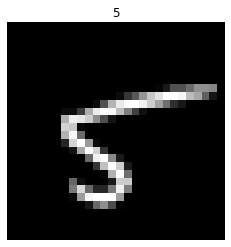

In [11]:
# Visualize Data
index = random.randrange(0, len(x_train))

plt.figure(1)
plt.title(y_train[index])
plt.imshow(x_train[index])
plt.gray()
plt.axis('off')
plt.show()

In [12]:
# TensorFlow solution 1
# Set rand seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  # Flattening the data turns it into a 1D array
  #   Takes the current shape and stacks it (multiply shape)
  #   From (28, 28) -> (, 784)
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Dense(10)
])

# Compile model
model_1.compile(
  # CategoricalCrossentropy must receive one-hot encoded data
  # Hence shape error
  # So instead we'll use SparseCategoricalCrossentropy() which can take in integers
  loss=tf.keras.losses.CategoricalCrossentropy(),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)

# Fit model
non_norm_history = model_1.fit(
  x_train,
  tf.one_hot(y_train, depth=10),
  epochs=10,
  validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 9.1650 - accuracy: 0.0979 - val_loss: 9.8562 - val_accuracy: 0.1023
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.8409 - accuracy: 0.1034 - val_loss: 9.8562 - val_accuracy: 0.1023
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.8409 - accuracy: 0.1034 - val_loss: 9.8562 - val_accuracy: 0.1023
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.8409 - accuracy: 0.1034 - val_loss: 9.8562 - val_accuracy: 0.1023
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.8409 - accuracy: 0.1034 - val_loss: 9.8562 - val_accuracy: 0.1023
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.8409 - accuracy: 0.1034 - val_loss: 9.8562 - val_accuracy: 0.1023
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.8409 - accuracy: 0.1034 - val_loss: 9.8562 - val_accuracy:

In [13]:
# TensorFlow solution 2
# Change: activation function

# Create the model
model_1 = tf.keras.Sequential([
    # Flattening our data turns it into a 1D array
    #   Takes the current shape and stacks it (multiply shape)
    #   In this case (28,28) -> (, 784)
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile model
model_1.compile(
    # CategoricalCrossentropy must receive one-hot encoded data
    # Hence shape error
    # So instead we'll use SparseCategoricalCrossentropy() which can take in integers
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
non_norm_history = model_1.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3050 - accuracy: 0.5559 - val_loss: 0.8816 - val_accuracy: 0.7248
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7364 - accuracy: 0.7903 - val_loss: 0.6102 - val_accuracy: 0.8341
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5954 - accuracy: 0.8340 - val_loss: 0.5613 - val_accuracy: 0.8489
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5537 - accuracy: 0.8454 - val_loss: 0.5584 - val_accuracy: 0.8492
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5338 - accuracy: 0.8496 - val_loss: 0.5211 - val_accuracy: 0.8594
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5213 - accuracy: 0.8534 - val_loss: 0.5114 - val_accuracy: 0.8603
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5110 - accuracy: 0.8558 - val_loss: 0.5146 - val_accuracy:

In [19]:
# TensorFlow solution 3

# set rand seed
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=["accuracy"]
)

# Fit model
history_4 = model_4.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.8968 - accuracy: 0.6977 - val_loss: 0.6790 - val_accuracy: 0.7763
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6418 - accuracy: 0.8002 - val_loss: 0.6451 - val_accuracy: 0.8041
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5956 - accuracy: 0.8210 - val_loss: 0.5954 - val_accuracy: 0.8244
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5682 - accuracy: 0.8292 - val_loss: 0.5736 - val_accuracy: 0.8302
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5517 - accuracy: 0.8353 - val_loss: 0.5641 - val_accuracy: 0.8333
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5386 - accuracy: 0.8392 - val_loss: 0.5646 - val_accuracy: 0.8363
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5270 - accuracy: 0.8438 - val_loss: 0.5471 - val_accuracy: